In [1]:
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
def errors(n, r=1):

    # mesh and function spaces
    mesh = UnitIntervalMesh(n)
    S_element = VectorElement("CG", mesh.ufl_cell(), 1)
    V_element = FiniteElement("DG", mesh.ufl_cell(), r)
    W = FunctionSpace(mesh, S_element*V_element)
    
    # set up problem
    #f = Constant(2.0)
    f = Expression("pow(pi,2)*sin(pi*x[0])", degree=r)
    s, u = TrialFunctions(W)
    t, v = TestFunctions(W)
    a = (dot(grad(u),grad(v)) + div(s*v + t*u))*dx
    L = f*v*dx
    
    # find numerical solution
    w = Function(W)
    solve(a == L, w)
    s, u = w.split()
    
    neg_grad_u = project(-grad(u), VectorFunctionSpace(mesh, "DG", r-1))
    
    # exact solutions
    s_exact = Expression(("-pi*cos(pi*x[0])",), degree=r+3)
    u_exact = Expression("sin(pi*x[0])", degree=r+3)
    
    s_error = errornorm(s_exact, s)
    u_error = errornorm(u_exact, u)
    grad_u_error = errornorm(s_exact, neg_grad_u)
    
    return s_error, u_error, grad_u_error

In [3]:
ns = [2**k for k in range(1,7)]
es = [errors(n, r=3) for n in ns]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FF

Text(0, 0.5, 'error')

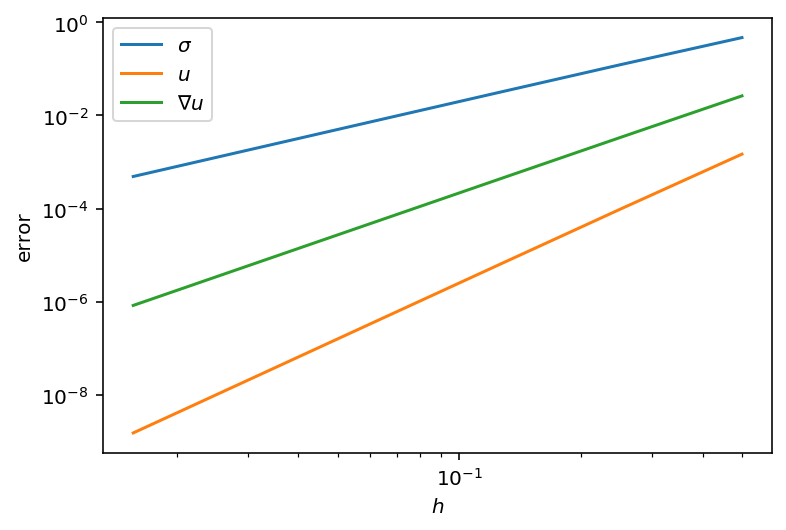

In [4]:
plt.loglog(1/np.array(ns), es, basex=10, basey=10)
plt.legend([r'$\sigma$','$u$',r'$\nabla u$'])
plt.xlabel('$h$')
plt.ylabel('error')

In [5]:
es

[(0.47249561648042826, 0.0014778581057703398, 0.026395369199301175),
 (0.12330269660516148, 9.690121239802556e-05, 0.0033673613018040476),
 (0.03116014610479844, 6.1313227241922374e-06, 0.0004230252493078345),
 (0.007811110746976527, 3.8439659571866093e-07, 5.294378463131703e-05),
 (0.001954097479841455, 2.4043741405618645e-08, 6.62002273788741e-06),
 (0.0004886068888516124, 1.504532047016587e-09, 8.27566909974691e-07)]

In [6]:
rates = -np.diff(np.log2(es), axis=0)
rates

array([[1.93809659, 3.93084923, 2.97059442],
       [1.98443045, 3.98224447, 2.99280284],
       [1.99610238, 3.99553088, 2.99821054],
       [1.99902528, 3.99886225, 2.99955325],
       [1.99975633, 3.99827467, 2.99988831]])